In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

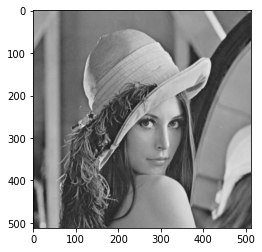

In [33]:
lena = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(lena, cmap='gray', vmin=0, vmax=255)

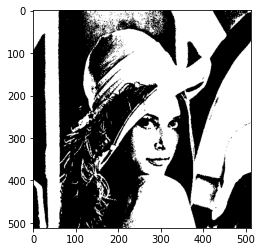

In [34]:
def binarize(lena, thr=128):
    after = copy.deepcopy(lena)
    for r in range(after.shape[0]):
        for c in range(after.shape[1]):
            if (after[r][c] < thr) : after[r][c] = 0
            else: after[r][c] = 255
    return after
bina = binarize(lena)
plt.imshow(bina, cmap='gray', vmin=0, vmax=255)

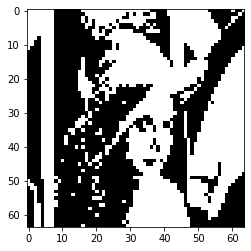

In [35]:
def downsample(bina):
    after = np.zeros((64, 64))
    for r in range(after.shape[0]):
        for c in range(after.shape[1]):
            after[r][c] = bina[r*8][c*8]
    return after
downa = downsample(bina)
plt.imshow(downa, cmap='gray', vmin=0, vmax=255)

In [36]:
def h(b, c, d, e):
    if (b == c) and (d != b or e != b):
        return 'q'
    elif (b == c) and (d == b and e == b):
        return 'r'
    elif (b != c):
        return 's'

def f(a_list):
    r_num = 0
    q_num = 0
    for a in a_list:
        if a == 'q': q_num +=1
        if a == 'r': r_num +=1
    if (r_num == 4): return 5
    else: return q_num

def yokoi(downa):
    after = np.zeros((64, 64))
    blocks = [
        [(0, 0), ( 0,   1), (-1,  1), (-1,  0)], 
        [(0, 0), (-1,   0), (-1, -1), ( 0, -1)], 
        [(0, 0), ( 0,  -1), ( 1, -1), ( 1,  0)], 
        [(0, 0), ( 1,   0), ( 1,  1), ( 0,  1)], 
    ]
    for r in range(downa.shape[0]):
        for c in range(downa.shape[1]):
            if downa[r][c] == 255:
                a = []
                for blk in blocks:
                    p = []
                    for ofst in blk:
                        if (r+ofst[0] >= 0 and r+ofst[0] < downa.shape[0]) and (c+ofst[1] >= 0 and c+ofst[1] < downa.shape[1]): 
                            p.append(downa[r + ofst[0]][c + ofst[1]])
                        else:
                            p.append(0)
                    a.append(h(p[0], p[1], p[2], p[3]))
                after[r][c] = f(a)
    return after

yona = yokoi(downa)
with open('yona.txt', 'w') as file:
    for line in yona:
        for p in line:
            if p == 0:
                file.write(' ')
            else:
                file.write(str(int(p)))
        file.write('\n')
            

In [37]:
WIDE_MAP = {i: i + 0xFEE0 for i in range(0x21, 0x7F)}
WIDE_MAP[0x20] = 0x3000

def widen(s):
    """
    Convert all ASCII characters to their full-width counterpart.
    
    >>> print widen('test, Foo!')
    ｔｅｓｔ，　Ｆｏｏ！
    >>> 
    """
    return s.translate(WIDE_MAP)

with open('yona_w.txt', 'w') as file:
    for line in yona:
        for p in line:
            if p == 0:
                file.write(widen(' '))
            else:
                file.write(widen(str(int(p))))
        file.write('\n')